# Import Module and Preview Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
df = df.iloc[:,[0,1]]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [4]:
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [5]:
df['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

[Text(0.5, 0, 'Text Length'), Text(0.5, 1.0, 'SPAM')]

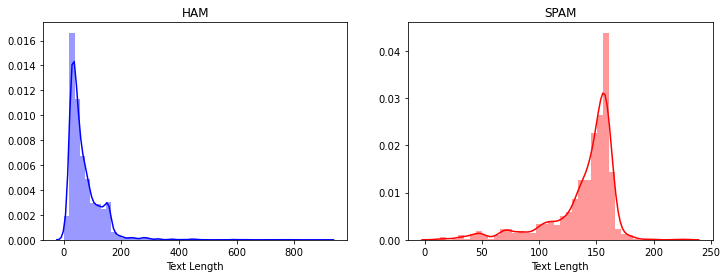

In [6]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.distplot(ham['length'], ax=ax[0], color='b')
ax[0].set(xlabel='Text Length', title='HAM')
sns.distplot(spam['length'], ax=ax[1], color='r')
ax[1].set(xlabel='Text Length',title='SPAM')

# Prepare Text Data

In [7]:
from nltk.corpus import stopwords
import string

In [8]:
def tidy_text(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [9]:
df['message'].head().apply(tidy_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=tidy_text)
vectorizer.fit(df['message'])
print('Total number of words: ', len(vectorizer.vocabulary_))

Total number of words:  11304


In [11]:
print('Before vectorized: ', df['message'][3])
vector4 = vectorizer.transform([df['message'][3]])
print('After vectorized:\n', vector4)

Before vectorized:  U dun say so early hor... U c already then say...
After vectorized:
   (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2


In [12]:
message_vector = vectorizer.transform(df['message'])

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(message_vector)

TfidfTransformer()

In [14]:
tfidf4 = tfidf_transformer.transform(vector4)
print('Tfidf transformed:\n', tfidf4)

VTfidf transformed:
   (0, 9445)	0.5391515179363724
  (0, 7091)	0.438375519235493
  (0, 6136)	0.3183143011307023
  (0, 6118)	0.2991551295536476
  (0, 5179)	0.2969195675145299
  (0, 4551)	0.26585776633899993
  (0, 3996)	0.40924708612713756


# Classification Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

msg_train, msg_test, label_train, label_test = train_test_split(df['message'], df['label'], test_size=0.2)

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=tidy_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [16]:
from sklearn.metrics import classification_report

pipeline.fit(msg_train, label_train)
label_pred = pipeline.predict(msg_test)
print(classification_report(label_pred, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.94      0.97      1000
        spam       0.67      1.00      0.80       115

    accuracy                           0.95      1115
   macro avg       0.83      0.97      0.89      1115
weighted avg       0.97      0.95      0.95      1115



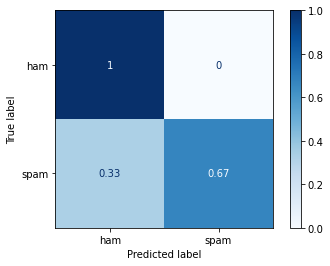

In [23]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline, msg_test, label_test,cmap='Blues', normalize='true')